In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head() 

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


# EDA


In [ ]:
#! pip install openpyxl
#data = pd.read_parquet(Path("data") / "train.parquet")
#data.to_excel('output.xlsx', index=False)

In [57]:
data.describe()

,site_id,bike_count,date,counter_installation_date,latitude,longitude,log_bike_count
count,4.968270e+05,496827.000000,496827,496827,496827.000000,496827.000000,496827.000000
mean,1.053450e+08,60.191475,2021-03-08 07:25:59.668858,2019-04-04 07:24:35.245911,48.854343,2.345479,3.079917
min,1.000070e+08,0.000000,2020-09-01 01:00:00,2013-01-18 00:00:00,48.826360,2.265420,0.000000
25%,1.000475e+08,5.000000,2020-12-05 22:00:00,2018-11-29 00:00:00,48.840801,2.314440,1.791759
50%,1.000562e+08,29.000000,2021-03-08 11:00:00,2019-11-06 00:00:00,48.852090,2.353870,3.401197
75%,1.000563e+08,79.000000,2021-06-09 14:00:00,2019-12-11 00:00:00,48.864610,2.375870,4.382027
max,3.000147e+08,1302.000000,2021-09-09 23:00:00,2020-11-29 00:00:00,48.891720,2.409690,7.172425
std,3.210346e+07,87.590566,NaN,NaN,0.018554,0.038026,1.659899


_ count is right skewed with max being 1300, meaning one every 3 seconds. BUT HOW IS LOG_COUNT?  
_ count registered is from september 1st 2020 to september 9th 2021  
_ one counter is much older than the others (2013 vs 2018-2020)  
_ one counter was installed on November 29th after the 1st day of count == 1st september  
_ it can be inferred from the location of some counters that a count registered from one counter will result in a count registered from another counter with a high probability  
_ 

We can check general information about different columns:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

and in particular the number of unique entries in each column,

In [4]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

We have a 30 counting sites where sometimes multiple counters are installed per location.  Let's look at the most frequented stations:

In [5]:
(
    data.groupby(["site_name", "counter_name"])["bike_count"].sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

/var/folders/5w/hyfqlrq101nd83437kh5nlm00000gn/T/ipykernel_32692/1192055722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["site_name", "counter_name"])["bike_count"].sum()


,,bike_count
site_name,counter_name,
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol S-N,1992227.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli O-E,1551730.0
Totem 73 boulevard de Sébastopol,Totem 73 boulevard de Sébastopol N-S,1497912.0
67 boulevard Voltaire SE-NO,67 boulevard Voltaire SE-NO,1130565.0
Totem 64 Rue de Rivoli,Totem 64 Rue de Rivoli E-O,1015875.0
27 quai de la Tournelle,27 quai de la Tournelle SE-NO,984914.0
Quai d'Orsay,Quai d'Orsay E-O,948357.0
Totem Cours la Reine,Totem Cours la Reine O-E,894937.0
Face au 48 quai de la marne,Face au 48 quai de la marne SO-NE,884907.0


# Visualizing the data


Let's visualize the data, starting from the spatial distribution of counters on the map

In [6]:
import folium

m = folium.Map(location=data[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for _, row in (
    data[["counter_name", "latitude", "longitude"]]
    .drop_duplicates("counter_name")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(), popup=row["counter_name"]
    ).add_to(m)

m

/Users/vincentmaladiere/mambaforge/envs/bike_counters/lib/python3.10/site-packages/folium/utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


Note that in this challenge, we consider only the 30 most frequented counting sites, to limit data size.  

**Spatial analysis of counters  
_ Some are close to parks  
_ Many are close to La Seine  
_ Some are on big avenueswhere there is a lot of traffic  
_ Some are close to famous attractions/places**



Next we will look into the temporal distribution of the most frequented bike counter. If we plot it directly we will not see much because there are half a million data points:

<Axes: xlabel='date'>

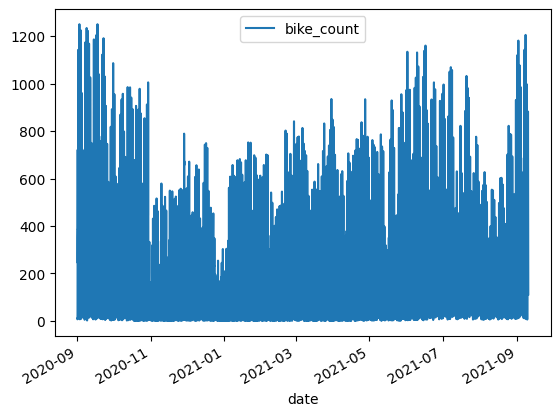

In [14]:
mask = data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"

data_sorted = data[mask].sort_values(by="date")

data_sorted.plot(x="date", y="bike_count")

Instead we aggregate the data, for instance, by week to have a clearer overall picture:

<Axes: xlabel='date'>

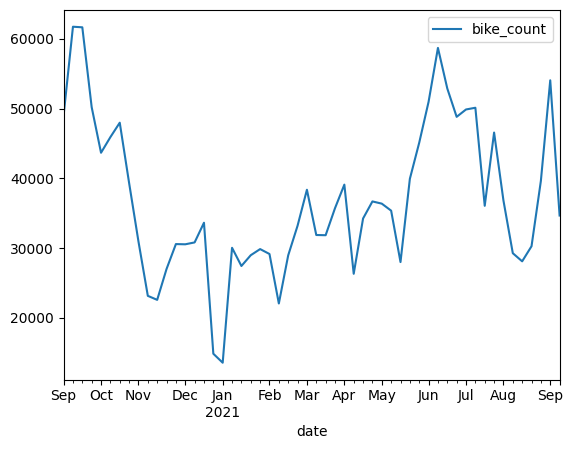

In [8]:
mask = (data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")

data[mask].groupby(
    pd.Grouper(freq="1w", key="date")
)[["bike_count"]].sum().plot()

### correlation to look back later

I WANT TO SEE THE CORRELATION BETWEEN THE LOG BIKE COUNT BETWEEN TWO COUNTERS FOR EACH HOUR OF THE DAY. 

C:\Users\emman\AppData\Local\Temp\ipykernel_56576\2526708095.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = hour_data.pivot_table(
C:\Users\emman\AppData\Local\Temp\ipykernel_56576\2526708095.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


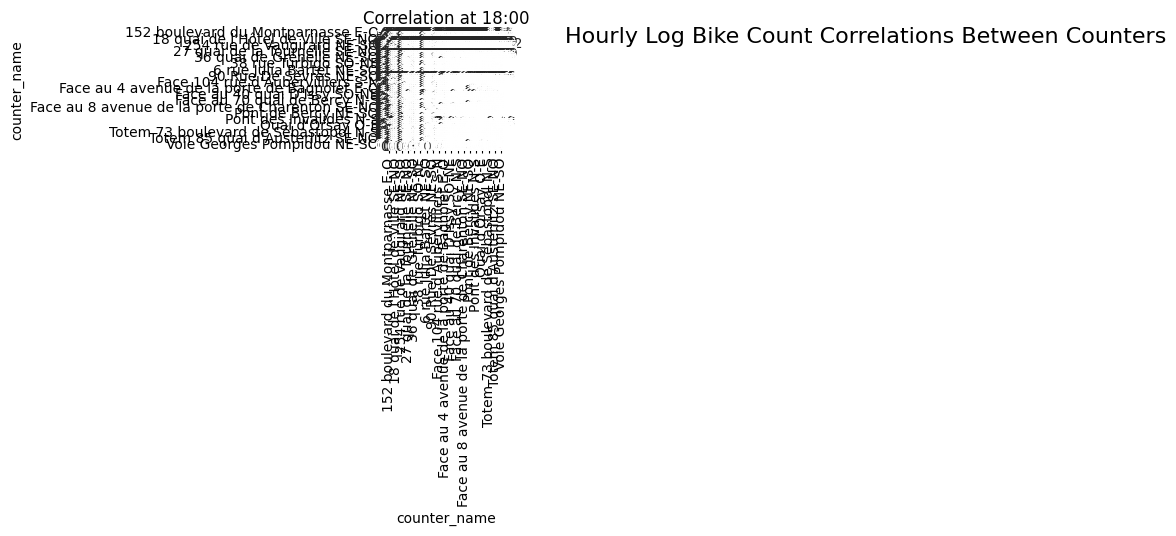

Hourly Correlation Analysis Summary:

Hour 18:00
Highest correlations:
counter_name                          counter_name                     
152 boulevard du Montparnasse O-E     152 boulevard du Montparnasse E-O    0.979620
Totem 73 boulevard de Sébastopol S-N  Totem 64 Rue de Rivoli O-E           0.978347
Totem 64 Rue de Rivoli O-E            36 quai de Grenelle NE-SO            0.963806
Totem 85 quai d'Austerlitz SE-NO      39 quai François Mauriac NO-SE       0.963185
Totem 64 Rue de Rivoli O-E            27 quai de la Tournelle NO-SE        0.960378
dtype: float64


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_hourly_bike_count_correlations(df):
    """
    Analyze correlations of log bike counts between different counters for each hour of the day.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    
    Returns:
    dict: A dictionary of correlation matrices for each hour of the day
    """
    # Extract hour from the date column
    df['hour'] = pd.to_datetime(df['date']).dt.hour
    
    # Dictionary to store correlation matrices
    hourly_correlations = {}
    
    # Create correlation matrix for each hour
    for hour in range(18,19):
        # Filter data for the specific hour
        hour_data = df[df['hour'] == hour]
        
        # Pivot the data to create a matrix of log bike counts for each counter
        pivot_data = hour_data.pivot_table(
            index='date', 
            columns='counter_name', 
            values='log_bike_count', 
            aggfunc='first'
        )
        
        # Calculate correlation matrix for this hour
        if not pivot_data.empty:
            correlation_matrix = pivot_data.corr()
            hourly_correlations[hour] = correlation_matrix
    
    return hourly_correlations

def visualize_hourly_correlations(hourly_correlations):
    """
    Create heatmaps to visualize correlations for each hour of the day.
    
    Parameters:
    hourly_correlations (dict): Dictionary of correlation matrices for each hour
    """
    # Determine number of unique hours with correlation data
    hours_with_data = list(hourly_correlations.keys())
    num_hours = len(hours_with_data)
    
    # Calculate grid dimensions
    cols = 4
    rows = (num_hours + cols - 1) // cols
    
    # Create a figure with subplots
    plt.figure(figsize=(20, 5 * rows))
    
    # Plot correlation heatmaps for each hour
    for i, hour in enumerate(hours_with_data, 1):
        plt.subplot(rows, cols, i)
        
        # Get correlation matrix for this hour
        corr_matrix = hourly_correlations[hour]
        
        # Create heatmap
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            square=True,
            cbar=False
        )
        plt.title(f'Correlation at {hour:02d}:00')
        plt.tight_layout()
    
    plt.suptitle('Hourly Log Bike Count Correlations Between Counters', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def main(df):
    """
    Main function to run the correlation analysis.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    """
    # Analyze hourly correlations
    hourly_correlations = analyze_hourly_bike_count_correlations(df)
    
    # Visualize the correlations
    visualize_hourly_correlations(hourly_correlations)
    
    # Optional: Print out some key insights
    print("Hourly Correlation Analysis Summary:")
    for hour, corr_matrix in hourly_correlations.items():
        print(f"\nHour {hour:02d}:00")
        print("Highest correlations:")
        # Get upper triangle of correlation matrix (excluding diagonal)
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        top_correlations = upper_tri.unstack().sort_values(kind="quicksort", ascending=False)
        print(top_correlations[top_correlations > 0.5].head())

# Example usage (commented out - replace with your actual data loading)
# df = pd.read_csv('your_bike_count_data.csv')
main(data)

C:\Users\emman\AppData\Local\Temp\ipykernel_56576\2783121687.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = hour_data.pivot_table(
C:\Users\emman\AppData\Local\Temp\ipykernel_56576\2783121687.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = hour_data.pivot_table(
C:\Users\emman\AppData\Local\Temp\ipykernel_56576\2783121687.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = hour_data.pivot_table(
C:\Users\emman\AppData\Local\Temp\ipykernel_56576\27831216

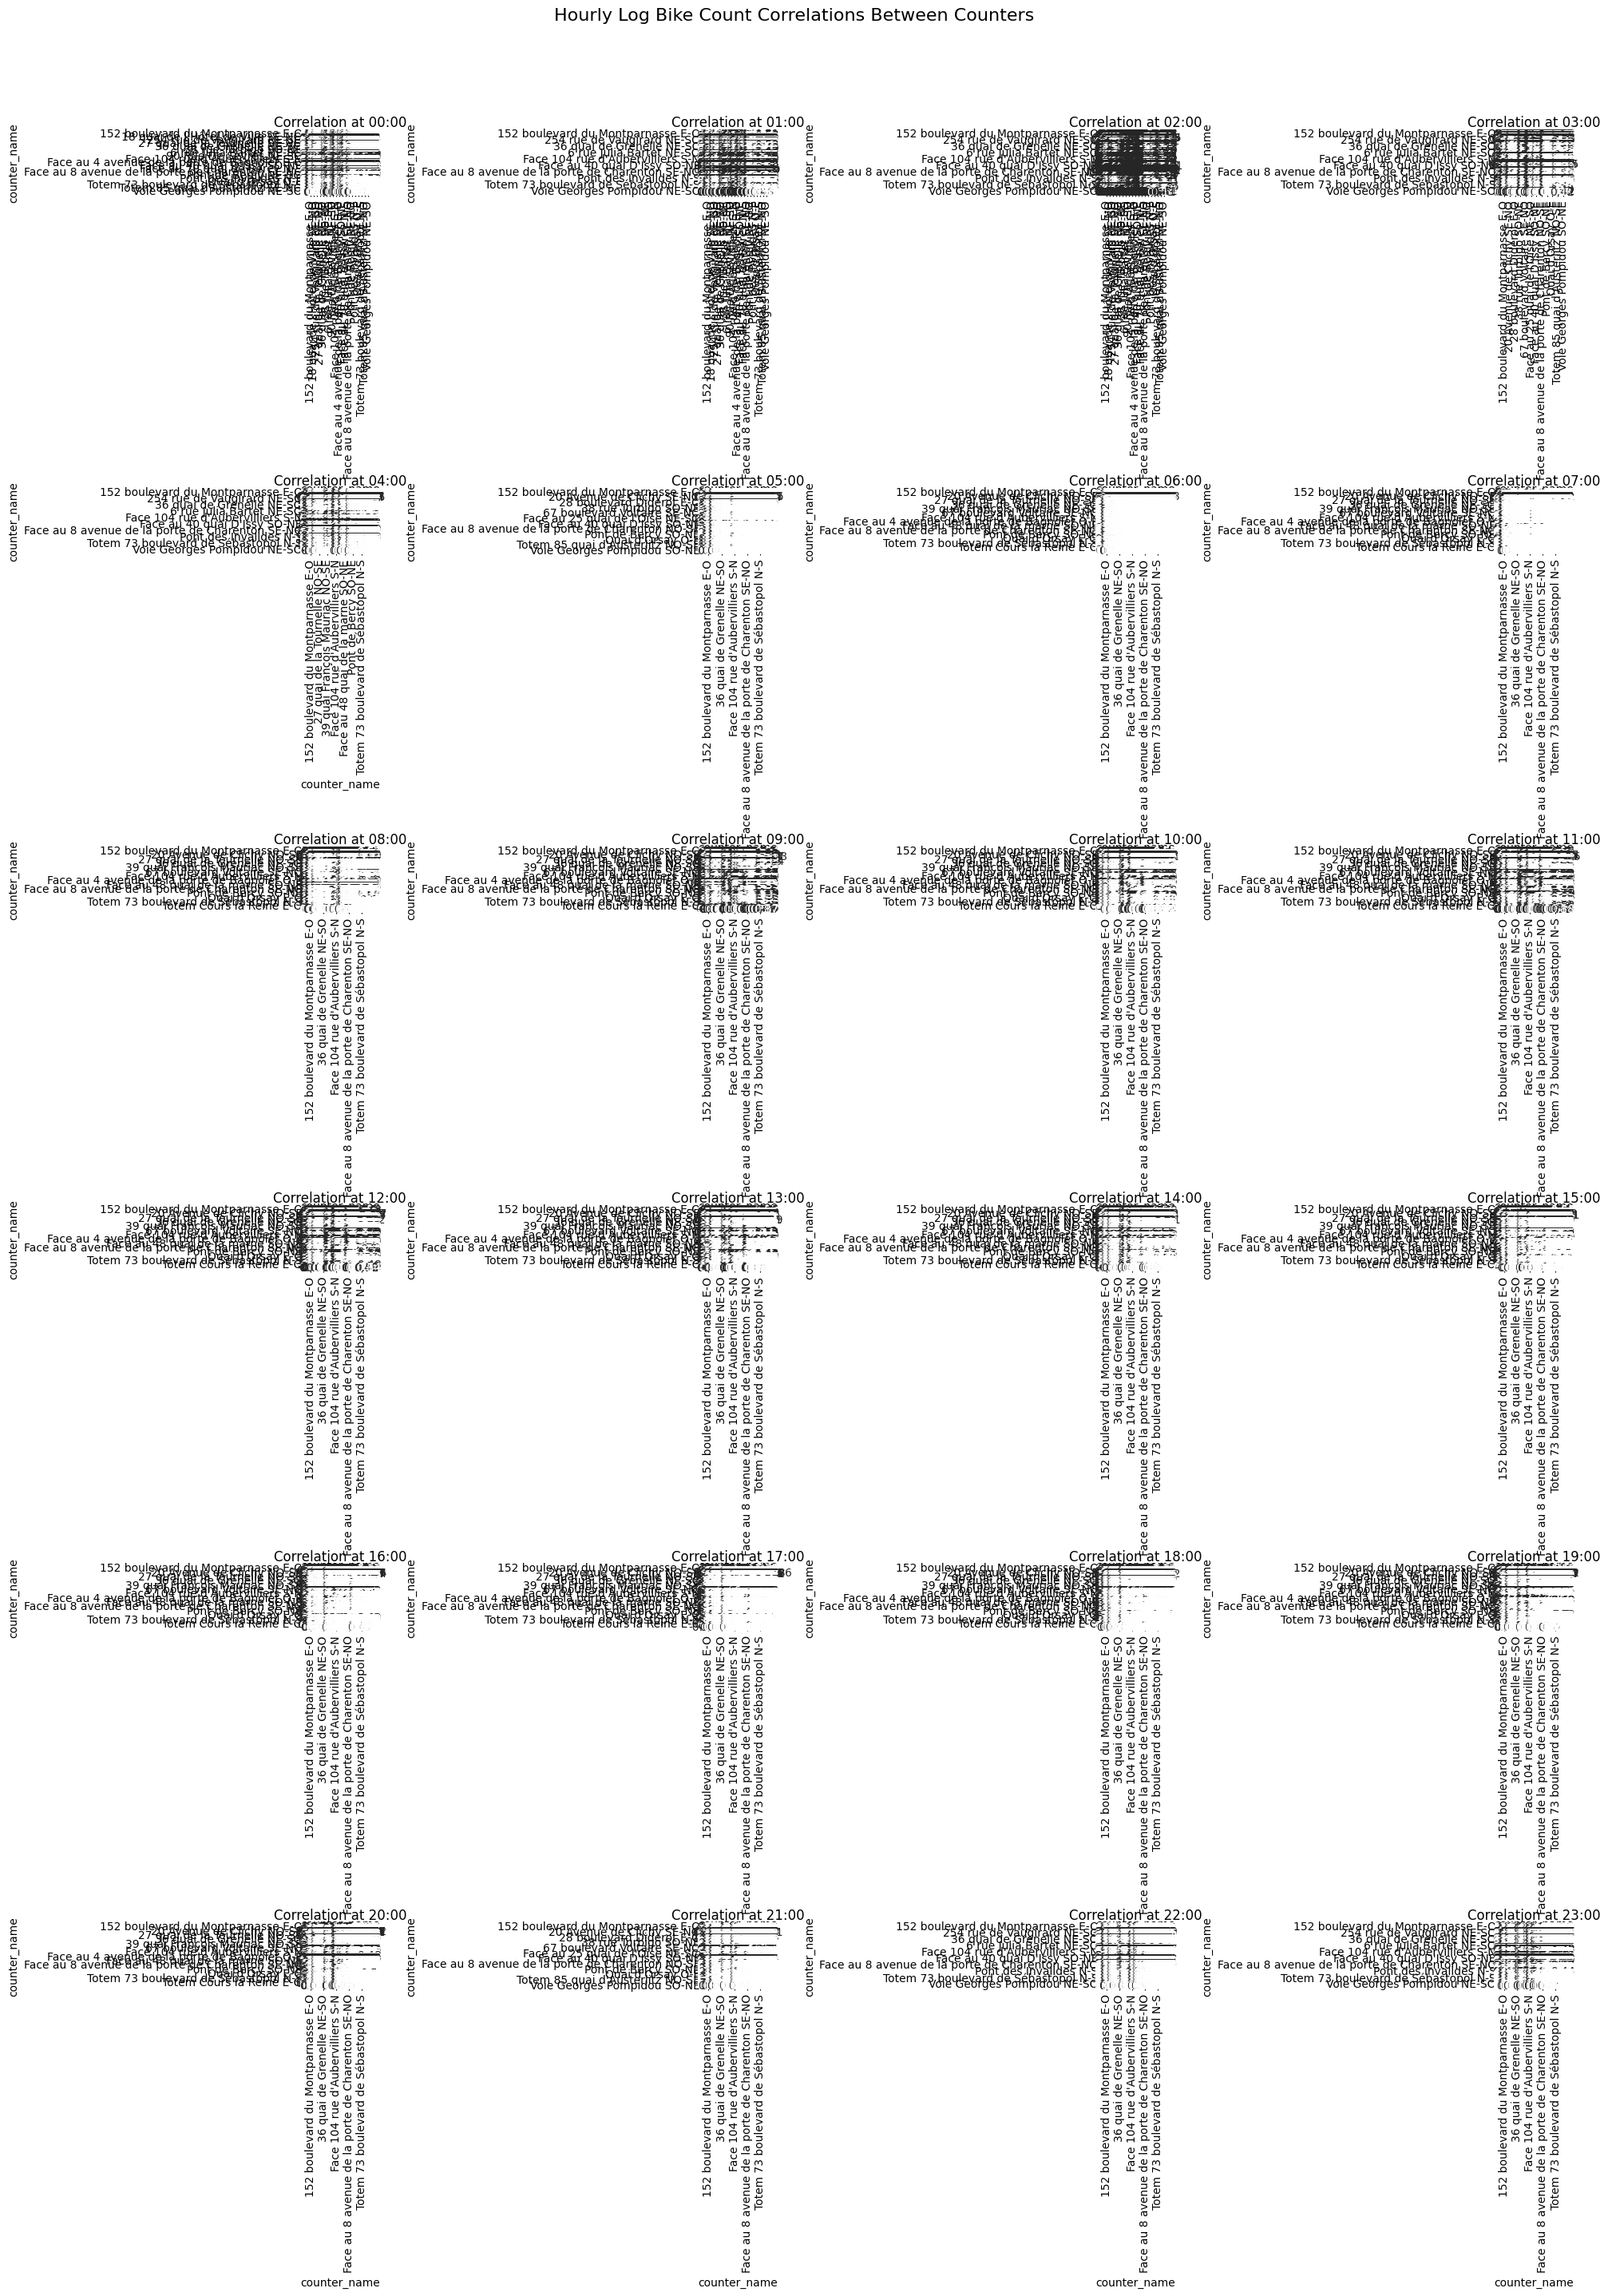

Hourly Correlation Analysis Summary:

Hour 00:00
Highest correlations:
counter_name                          counter_name                        
Totem 73 boulevard de Sébastopol S-N  Totem 73 boulevard de Sébastopol N-S    0.884286
Totem 85 quai d'Austerlitz SE-NO      27 quai de la Tournelle NO-SE           0.874494
Totem 73 boulevard de Sébastopol S-N  38 rue Turbigo SO-NE                    0.874048
Totem 64 Rue de Rivoli O-E            27 quai de la Tournelle SE-NO           0.871053
Totem 73 boulevard de Sébastopol S-N  Totem 64 Rue de Rivoli O-E              0.869080
dtype: float64

Hour 01:00
Highest correlations:
counter_name                          counter_name                  
Totem 85 quai d'Austerlitz SE-NO      39 quai François Mauriac NO-SE    0.837946
Totem 73 boulevard de Sébastopol S-N  Totem 64 Rue de Rivoli O-E        0.829932
Totem 85 quai d'Austerlitz SE-NO      27 quai de la Tournelle NO-SE     0.828089
Totem 73 boulevard de Sébastopol S-N  27 quai de la Tourne

In [11]:
main(data)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_hourly_bike_count_correlations(df, top_n=5):
    """
    Analyze correlations of log bike counts between top N counters for each hour of the day.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    top_n (int): Number of top counters to analyze by total bike count
    
    Returns:
    dict: A dictionary of correlation matrices for each hour of the day
    """
    # Identify top N counters by total bike count
    #top_counters = df.groupby('counter_name')['bike_count'].sum().nlargest(top_n).index.tolist()
    top_counters = 
    
    # Filter data for top counters
    df_top_counters = df[df['counter_name'].isin(top_counters)]
    
    # Extract hour from the date column
    df_top_counters['hour'] = pd.to_datetime(df_top_counters['date']).dt.hour
    
    # Dictionary to store correlation matrices
    hourly_correlations = {}
    
    # Create correlation matrix for each hour
    for hour in range(24):
        # Filter data for the specific hour
        hour_data = df_top_counters[df_top_counters['hour'] == hour]
        
        # Pivot the data to create a matrix of log bike counts for each counter
        pivot_data = hour_data.pivot_table(
            index='date', 
            columns='counter_name', 
            values='log_bike_count', 
            aggfunc='first'
        )
        
        # Calculate correlation matrix for this hour
        if not pivot_data.empty:
            correlation_matrix = pivot_data.corr()
            hourly_correlations[hour] = correlation_matrix
    
    return hourly_correlations, top_counters

def visualize_hourly_correlations(hourly_correlations, top_counters):
    """
    Create heatmaps to visualize correlations for each hour of the day for top counters.
    
    Parameters:
    hourly_correlations (dict): Dictionary of correlation matrices for each hour
    top_counters (list): List of top counter names
    """
    # Determine number of unique hours with correlation data
    hours_with_data = list(hourly_correlations.keys())
    num_hours = len(hours_with_data)
    
    # Calculate grid dimensions
    cols = 4
    rows = (num_hours + cols - 1) // cols
    
    # Create a figure with subplots
    plt.figure(figsize=(20, 5 * rows))
    
    # Plot correlation heatmaps for each hour
    for i, hour in enumerate(hours_with_data, 1):
        plt.subplot(rows, cols, i)
        
        # Get correlation matrix for this hour
        corr_matrix = hourly_correlations[hour]
        
        # Create heatmap
        sns.heatmap(
            corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            square=True,
            cbar=False,
            fmt='.2f'
        )
        plt.title(f'Correlation at {hour:02d}:00')
        plt.tight_layout()
    
    plt.suptitle(f'Hourly Log Bike Count Correlations\nTop {len(top_counters)} Counters', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def print_correlation_insights(hourly_correlations):
    """
    Print key insights about hourly correlations.
    
    Parameters:
    hourly_correlations (dict): Dictionary of correlation matrices for each hour
    """
    print("Hourly Correlation Analysis Insights:")
    print("-" * 50)
    
    for hour, corr_matrix in hourly_correlations.items():
        print(f"\nHour {hour:02d}:00")
        
        # Get upper triangle of correlation matrix (excluding diagonal)
        upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        
        # Find strong correlations (absolute value > 0.5)
        strong_correlations = upper_tri[np.abs(upper_tri) > 0.5]
        
        if not strong_correlations.empty:
            print("Strong Correlations:")
            for (counter1, counter2), correlation in strong_correlations.items():
                print(f"{counter1} - {counter2}: {correlation:.2f}")
        else:
            print("No strong correlations (>0.5 or <-0.5) found.")

def main(df, top_n=5):
    """
    Main function to run the correlation analysis for top N counters.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing bike count data
    top_n (int): Number of top counters to analyze
    """
    # Analyze hourly correlations for top counters
    hourly_correlations, top_counters = analyze_hourly_bike_count_correlations(df, top_n)
    
    # Visualize the correlations
    visualize_hourly_correlations(hourly_correlations, top_counters)
    
    # Print correlation insights
    print_correlation_insights(hourly_correlations)

# Example usage (commented out - replace with your actual data loading)
# df = pd.read_csv('your_bike_count_data.csv')
# main(df)

I want to visualise the bicycle count for each counter day per day for the 2nd week of October 2024

I WANT TO STUDY OUTLIERS.

=> highest peak in september 2020  
=> lowest peak in january => winter?

### 

While at the same time, we can zoom on a week in particular for a more short-term visualization,

<Axes: xlabel='date'>

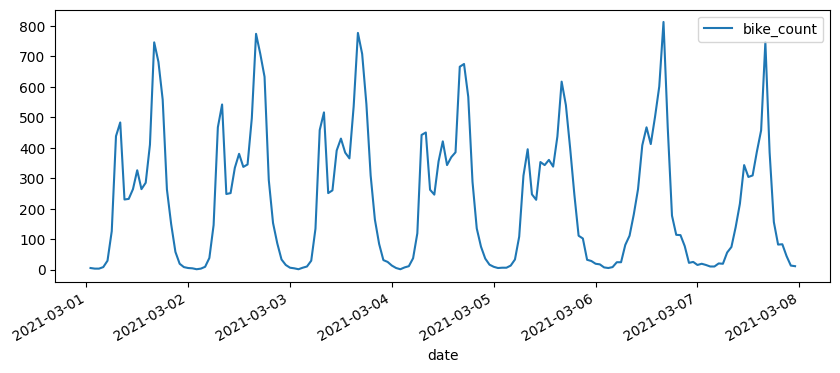

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))

mask = (
    (data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")
    & (data["date"] > pd.to_datetime("2021/03/01"))
    & (data["date"] < pd.to_datetime("2021/03/08"))
)

data[mask].plot(x="date", y="bike_count", ax=ax)

The hourly pattern has a clear variation between work days and weekends (7 and 8 March 2021).

If we look at the distribution of the target variable it skewed and non normal, 

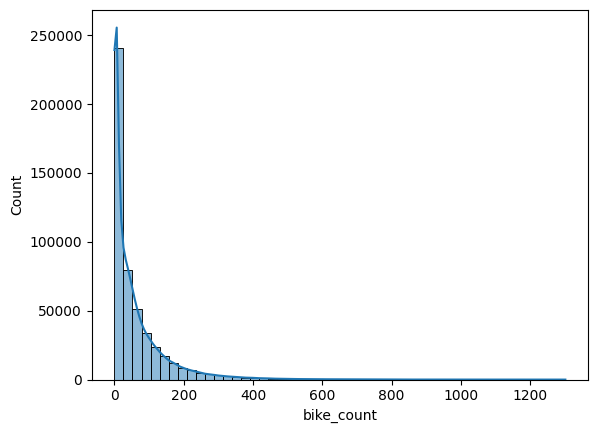

In [7]:
import seaborn as sns


ax = sns.histplot(data, x="bike_count", kde=True, bins=50)

Least square loss would not be appropriate to model it since it is designed for normal error distributions. One way to precede would be to transform the variable with a logarithmic transformation,
```py
data['log_bike_count'] = np.log(1 + data['bike_count'])
```

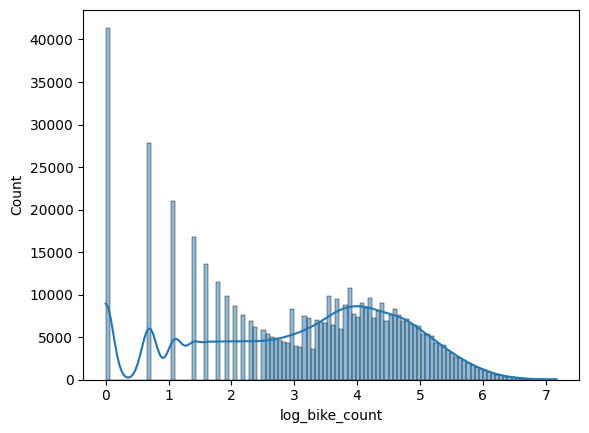

In [8]:
ax = sns.histplot(data, x="log_bike_count", kde=True)

which has a more pronounced central mode, but is still non symmetric. In the following, **we use `log_bike_count` as the target variable** as otherwise `bike_count` ranges over 3 orders of magnitude and least square loss would be dominated by the few large values. 

# 

## DATA AUGMENTATION STEP

In [98]:
# added code 1
df = pd.read_csv('comptage-velo-donnees-compteurs.csv', sep=';')


In [99]:
# added code 2

df.drop(columns=['ID Photos','Lien vers photo du site de comptage','test_lien_vers_photos_du_site_de_comptage_','id_photo_1', 'url_sites','type_dimage','mois_annee_comptage'], inplace=True)

df = df.rename(columns={
    'Identifiant du compteur': 'counter_id',
    'Nom du compteur': 'counter_name',
    'Identifiant du site de comptage': 'site_id',
    'Nom du site de comptage': 'site_name',
    'Comptage horaire': 'bike_count',
    'Date et heure de comptage': 'date',
    'Date d\'installation du site de comptage': 'counter_installation_date',
    'Coordonnées géographiques': 'coordinates',
    'Identifiant technique compteur': 'counter_technical_id'
})

df['latitude'] = df['coordinates'].str.split(',').str[0]
df['longitude'] = df['coordinates'].str.split(',').str[1]
#df['log_bike_count'] = np.log(df['bike_count'])
df['log_bike_count'] = np.log(df['bike_count'] + 1)
df[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']] = df[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']].astype('category')
#df['site_id'] = df['site_id'].astype('int64')


df1 = df.copy()
df1['date'] = pd.to_datetime(df1['date'], utc=True)
df1['date'] = df1['date'].dt.tz_localize(None)
df1['counter_installation_date'] = pd.to_datetime(df1['counter_installation_date'])
df1['latitude'] = df1['latitude'].astype('float64')
df1['longitude'] = df1['longitude'].astype('float64')
df1 = df1.sort_values(by='date', ascending=True)

site_ids = [
    100007049, 100036718, 100036719, 100042374, 100044493, 100047542, 100047545,
    100047546, 100047547, 100047548, 100049407, 100050876, 100056046, 100056047,
    100056223, 100056226, 100056327, 100056329, 100056330, 100056331, 100056332,
    100056334, 100056335, 100056336, 100057329, 100057380, 100057445, 100060178,
    100063175, 300014702
]
df1 = df1[df1['site_id'].isin(site_ids)]
df1

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
309628,100047548-103047548,Face au 25 quai de l'Oise NE-SO,100047548.0,Face au 25 quai de l'Oise,0,2022-04-05 03:00:00,2018-11-28,"48.89141, 2.38482",Y2H20083609,48.891410,2.384820,0.000000
317466,100047548-104047548,Face au 25 quai de l'Oise SO-NE,100047548.0,Face au 25 quai de l'Oise,0,2022-04-05 21:00:00,2018-11-28,"48.89141, 2.38482",Y2H20083609,48.891410,2.384820,0.000000
67892,100036719-103036719,18 quai de l'Hôtel de Ville SE-NO,100036719.0,18 quai de l'Hôtel de Ville,16,2023-11-01 03:00:00,2017-07-12,"48.85372, 2.35702",Y2H21015012,48.853720,2.357020,2.833213
535868,100056226-103056226,Face au 8 avenue de la porte de Charenton SE-NO,100056226.0,Face au 8 avenue de la porte de Charenton,6,2023-11-01 03:00:00,2019-11-01,"48.830331, 2.400551",Y2H19070370,48.830331,2.400551,1.945910
660114,100056335-104056335,Quai d'Orsay E-O,100056335.0,Quai d'Orsay,64,2023-11-01 03:00:00,2019-11-07,"48.8629, 2.3118",Y2H19070382,48.862900,2.311800,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...
307728,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,3,2024-12-07 22:00:00,2018-11-28,"48.82624, 2.30281",Y2H18086323,48.826240,2.302810,1.386294
414805,100050876-104050876,Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli ...,100050876.0,Totem 64 Rue de Rivoli,101,2024-12-07 22:00:00,2019-09-04,"48.85735, 2.35211",YTH19037970,48.857350,2.352110,4.624973
116503,100044493-101044493,67 boulevard Voltaire SE-NO,100044493.0,67 boulevard Voltaire,56,2024-12-07 22:00:00,2018-06-27,"48.86149, 2.37376",Y2H18034809,48.861490,2.373760,4.043051
757445,100057445-104057445,Totem 73 boulevard de Sébastopol S-N,100057445.0,Totem 73 boulevard de Sébastopol,132,2024-12-07 22:00:00,2020-02-11,"48.86377, 2.35096",YTH19111510,48.863770,2.350960,4.890349


In [100]:
def merge_identical_dataframes(df1, df2):
    # Columns to merge on (assuming these are the unique identifiers)
    merge_keys = ['counter_id', 'date']
    
    # Columns to include (all columns except merge keys)
    other_columns = [
        'counter_name', 'site_id', 'site_name', 'bike_count', 
        'counter_installation_date', 'coordinates', 
        'counter_technical_id', 'latitude', 'longitude', 
        'log_bike_count'
    ]
    
    # Verify column consistency
    def validate_dataframes(df1, df2):
        # Check if both DataFrames have exactly the same columns
        if set(df1.columns) != set(df2.columns):
            print("Warning: DataFrames have different column sets")
            print("Columns in first DataFrame:", set(df1.columns))
            print("Columns in second DataFrame:", set(df2.columns))
            return False
        return True
    
    # Validate DataFrames
    if not validate_dataframes(df1, df2):
        raise ValueError("DataFrames must have identical column structures")
    
    # Concatenate DataFrames vertically
    merged_df = pd.concat([df1, df2], ignore_index=True)
    
    # Optional: Remove exact duplicates
    merged_df = merged_df.drop_duplicates(subset=merge_keys)
    
    # Verify merge
    print(f"Original df1 shape: {df1.shape}")
    print(f"Original df2 shape: {df2.shape}")
    print(f"Merged DataFrame shape: {merged_df.shape}")
    
    # Check for any remaining duplicates
    duplicate_count = merged_df.duplicated(subset=merge_keys).sum()
    print(f"Number of duplicate entries after merge: {duplicate_count}")
    
    return merged_df

In [101]:
df_merged = merge_identical_dataframes(data, df1)
df_merged

Original df1 shape: (496827, 12)
Original df2 shape: (435767, 12)
Merged DataFrame shape: (932594, 12)
Number of duplicate entries after merge: 0


,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
0,100007049-102007049,28 boulevard Diderot E-O,100007049.0,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
1,100007049-102007049,28 boulevard Diderot E-O,100007049.0,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
2,100007049-102007049,28 boulevard Diderot E-O,100007049.0,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
3,100007049-102007049,28 boulevard Diderot E-O,100007049.0,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
4,100007049-102007049,28 boulevard Diderot E-O,100007049.0,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585
...,...,...,...,...,...,...,...,...,...,...,...,...
932589,100047547-103047547,6 rue Julia Bartet SO-NE,100047547.0,6 rue Julia Bartet,3.0,2024-12-07 22:00:00,2018-11-28,"48.82624, 2.30281",Y2H18086323,48.826240,2.302810,1.386294
932590,100050876-104050876,Totem 64 Rue de Rivoli Totem 64 Rue de Rivoli ...,100050876.0,Totem 64 Rue de Rivoli,101.0,2024-12-07 22:00:00,2019-09-04,"48.85735, 2.35211",YTH19037970,48.857350,2.352110,4.624973
932591,100044493-101044493,67 boulevard Voltaire SE-NO,100044493.0,67 boulevard Voltaire,56.0,2024-12-07 22:00:00,2018-06-27,"48.86149, 2.37376",Y2H18034809,48.861490,2.373760,4.043051
932592,100057445-104057445,Totem 73 boulevard de Sébastopol S-N,100057445.0,Totem 73 boulevard de Sébastopol,132.0,2024-12-07 22:00:00,2020-02-11,"48.86377, 2.35096",YTH19111510,48.863770,2.350960,4.890349


In [102]:
df_merged.shape

(932594, 12)

In [ ]:
#df_merged.dropna(inplace=True)
#df_merged.shape

(932594, 12)

In [104]:
df_merged[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']] = df_merged[['counter_id', 'counter_name', 'site_name', 'coordinates', 'counter_technical_id']].astype('category')
df_merged['site_id'] = df_merged['site_id'].astype('int64')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932594 entries, 0 to 932593
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 932594 non-null  category      
 1   counter_name               932594 non-null  category      
 2   site_id                    932594 non-null  int64         
 3   site_name                  932594 non-null  category      
 4   bike_count                 932594 non-null  float64       
 5   date                       932594 non-null  datetime64[ns]
 6   counter_installation_date  932594 non-null  datetime64[ns]
 7   coordinates                932594 non-null  category      
 8   counter_technical_id       932594 non-null  category      
 9   latitude                   932594 non-null  float64       
 10  longitude                  932594 non-null  float64       
 11  log_bike_count             932594 non-null  float64 

## Feature extraction

To account for the temporal aspects of the data, we cannot input the `date` field directly into the model. Instead we extract the features on different time-scales from the `date` field:

In [105]:
def _encode_dates(X):
    X = X.copy()  # modify a copy of X
    # Encode the date information from the DateOfDeparture columns
    X["year"] = X["date"].dt.year
    X["month"] = X["date"].dt.month
    X["day"] = X["date"].dt.day
    X["weekday"] = X["date"].dt.weekday
    X["hour"] = X["date"].dt.hour

    # Finally we can drop the original columns from the dataframe
    return X.drop(columns=["date"])

In [132]:
_encode_dates(df1[["date"]].head(5))

,year,month,day,weekday,hour
309628,2022,4,5,1,3
317466,2022,4,5,1,21
67892,2023,11,1,2,3
535868,2023,11,1,2,3
660114,2023,11,1,2,3


To use this function with scikit-learn estimators we wrap it with [FunctionTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html):

In [133]:
from sklearn.preprocessing import FunctionTransformer

date_encoder = FunctionTransformer(_encode_dates, validate=False)
sample_encoded = date_encoder.fit_transform(df1[["date"]]).head()
sample_encoded

,year,month,day,weekday,hour
309628,2022,4,5,1,3
317466,2022,4,5,1,21
67892,2023,11,1,2,3
535868,2023,11,1,2,3
660114,2023,11,1,2,3


Since it is unlikely that, for instance, that `hour` is linearly correlated with the target variable, we would need to additionally encode categorical features for linear models. This is classically done with [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), though other encoding strategies exist.

In [108]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

enc.fit_transform(sample_encoded[["hour"]])

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Linear model

Let's now construct our first linear model with [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). We use a few helper functions defined in `utils.py` of the starting kit to load the train set.

In [134]:
from utils import get_cv

X = df1.drop(['log_bike_count', "bike_count"], axis=1)
y = df1['log_bike_count'].values

# Now you can use the get_cv function
for train_indices, test_indices in get_cv(X, y):
    # These indices can be used to split your DataFrame
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    
    # Now you can use these for model training and validation
    # For example:
    # model.fit(X_train, y_train)
    # predictions = model.predict(X_test)

and

In [135]:
X.shape

(435767, 10)

Where `y` contains the `log_bike_count` variable. 

To test our baseline estimator, we create a validations set from the training set. Note that, during modeling and exploring the data, we always recommend using cross validation rather than a single train / validation split to evaluate your first results, because this will bring more stability and generalization.

We create the validation set by simply slicing the last 30 days of the training set:

In [136]:
def train_test_split_temporal(X, y, delta_threshold="30 days"):
    
    cutoff_date = X["date"].max() - pd.Timedelta(delta_threshold)
    mask = (X["date"] <= cutoff_date)
    X_train, X_valid = X.loc[mask], X.loc[~mask]
    y_train, y_valid = y[mask], y[~mask]

    return X_train, y_train, X_valid, y_valid

In [137]:
X_train, y_train, X_valid, y_valid = train_test_split_temporal(X, y)

print(
    f'Train: n_samples={X_train.shape[0]},  {X_train["date"].min()} to {X_train["date"].max()}'
)
print(
    f'Valid: n_samples={X_valid.shape[0]},  {X_valid["date"].min()} to {X_valid["date"].max()}'
)

Train: n_samples=400707,  2022-04-05 03:00:00 to 2024-11-07 22:00:00
Valid: n_samples=35060,  2024-11-07 23:00:00 to 2024-12-07 22:00:00


In [138]:
_encode_dates(X_train[["date"]]).columns.tolist()

['year', 'month', 'day', 'weekday', 'hour']

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

date_encoder = FunctionTransformer(_encode_dates)
date_cols = _encode_dates(X_train[["date"]]).columns.tolist()

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ]
)

regressor = Ridge()

pipe = make_pipeline(date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function _encode_dates at 0x0000019EB8318430>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('ridge', Ridge())])

We then evaluate this model with the RMSE metric,

In [140]:
from sklearn.metrics import mean_squared_error

print(
    f"Train set, RMSE={mean_squared_error(y_train, pipe.predict(X_train), squared=False):.2f}"
)
print(
    f"Valid set, RMSE={mean_squared_error(y_valid, pipe.predict(X_valid), squared=False):.2f}"
)

Train set, RMSE=0.83
Valid set, RMSE=0.80


c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [75]:
pipe.named_steps['ridge'].coef_

array([-2.17528080e-01, -3.30707222e-01, -2.74983598e-03,  4.55341438e-01,
        9.56436992e-02, -2.38208723e-01, -1.70613613e-01,  3.50741039e-02,
       -5.14194797e-02,  1.60241589e-02,  3.03786594e-01,  1.86664111e-01,
        9.89431859e-02,  4.00528388e-01,  1.04369994e-01, -2.51870328e-01,
       -4.33278392e-01, -3.30676261e-02, -1.42725675e-02,  4.08069042e-02,
        5.30439667e-02,  2.63190012e-02,  5.65979157e-02,  5.19556624e-02,
        5.21487067e-02,  5.27648530e-03, -1.34390769e-02,  8.58601519e-03,
        2.57654736e-03, -3.86451689e-03, -1.06672179e-02,  8.02463241e-03,
       -1.77574378e-02, -3.45773041e-02, -7.57544054e-03,  1.03744252e-02,
        1.98007125e-02,  2.38612769e-02, -7.12404234e-03, -5.12807821e-03,
       -3.38421194e-02, -8.09164297e-02, -6.12971157e-02, -7.48392280e-02,
        4.72945175e-02,  3.22041855e-02, -3.66747771e-03, -3.68352759e-02,
       -2.68652865e-02,  8.73415569e-02,  1.03799441e-01,  1.34518772e-01,
        1.12258145e-01, -

Feature Importance 

In [141]:
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
my_array = pd.DataFrame(feature_names)
type(my_array)

pandas.core.frame.DataFrame

In [142]:
np.shape(pipe.named_steps['ridge'].coef_)

(146,)

In [143]:
feature_names = pipe.named_steps['columntransformer'].get_feature_names_out()
coefs = pipe.named_steps['ridge'].coef_

df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
print(df)

                                             Feature  Coefficient
0                                    date__year_2022    -1.347569
1                                    date__year_2023     0.656356
2                                    date__year_2024     0.691213
3                                      date__month_1    -0.149208
4                                      date__month_2    -0.017018
..                                               ...          ...
141            cat__site_name_Totem 64 Rue de Rivoli     0.841669
142  cat__site_name_Totem 73 boulevard de Sébastopol     1.072415
143        cat__site_name_Totem 85 quai d'Austerlitz     0.389799
144              cat__site_name_Totem Cours la Reine    -1.171130
145             cat__site_name_Voie Georges Pompidou    -0.148906

[146 rows x 2 columns]


In [144]:
df = df.sort_values(by='Coefficient', ascending=False)
df.head(50)

,Feature,Coefficient
70,date__hour_17,1.214847
69,date__hour_16,1.171234
142,cat__site_name_Totem 73 boulevard de Sébastopol,1.072415
71,date__hour_18,0.922319
68,date__hour_15,0.904639
60,date__hour_7,0.867035
141,cat__site_name_Totem 64 Rue de Rivoli,0.841669
115,cat__counter_name_Totem 73 boulevard de Sébast...,0.736138
2,date__year_2024,0.691213
67,date__hour_14,0.677250


The model doesn't have enough capacity to generalize on the train set, since we have lots of data with relatively few parameters. However it happened to work somewhat better on the test set. We can compare these results with the baseline predicting the mean value,

In [145]:
import statsmodels.api as sm

# assume X is the design matrix and y is the response variable

# fit the Ridge model
ridge_model = Ridge()
ridge_model.fit(X, y)

# compute VIF for each feature
vif_values = []
for i in range(X.shape[1]):
    X_i = X[:, i]
    X_not_i = np.delete(X, i, axis=1)
    X_not_i = sm.add_constant(X_not_i)
    model = sm.OLS(X_i, X_not_i).fit()
    r2 = model.rsquared
    vif = 1 / (1 - r2)
    vif_values.append(vif)

print(vif_values)

ValueError: could not convert string to float: '100047548-103047548'

In [146]:
from sklearn.decomposition import PCA

# assume X is the design matrix and y is the response variable
X = ...  # design matrix
y = ...  # response variable

# apply PCA to the data
pca = PCA(n_components=0.95)  # retain 95% of the explained variance
X_pca = pca.fit_transform(X)

# train and test the Ridge model on the PCA-transformed data
ridge_model = Ridge()
ridge_model.fit(X_pca, y)
y_pred = ridge_model.predict(X_pca)

TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [148]:
print("Baseline mean prediction.")
print(
    f"Train set, RMSE={mean_squared_error(y_train, np.full(y_train.shape, y_train.mean()), squared=False):.2f}"
)
print(
    f"Test set, RMSE={mean_squared_error(y_valid, np.full(y_valid.shape, y_valid.mean()), squared=False):.2f}"
)

Baseline mean prediction.
Train set, RMSE=1.53
Test set, RMSE=1.47


c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


which illustrates that we are performing better than the baseline.

Let's visualize the predictions for one of the stations (we transform the logarithmic bike counts back to their original unit):

In [149]:
mask = (
    X_valid["counter_name"].str.contains("Sébastopol")
    & (X_valid["date"] > pd.to_datetime("2024-10-01"))
    & (X_valid["date"] < pd.to_datetime("2024-12-08"))
)
#print(mask.sum())  # This should be > 0
#print(len(X_valid))
#print(len(mask))
df_viz = X_valid.loc[mask].copy()
df_viz["bike_count"] = np.exp(y_valid[mask.values]) - 1
df_viz["bike_count (predicted)"] = np.exp(pipe.predict(X_valid[mask])) - 1

Text(0, 0.5, 'bike_count')

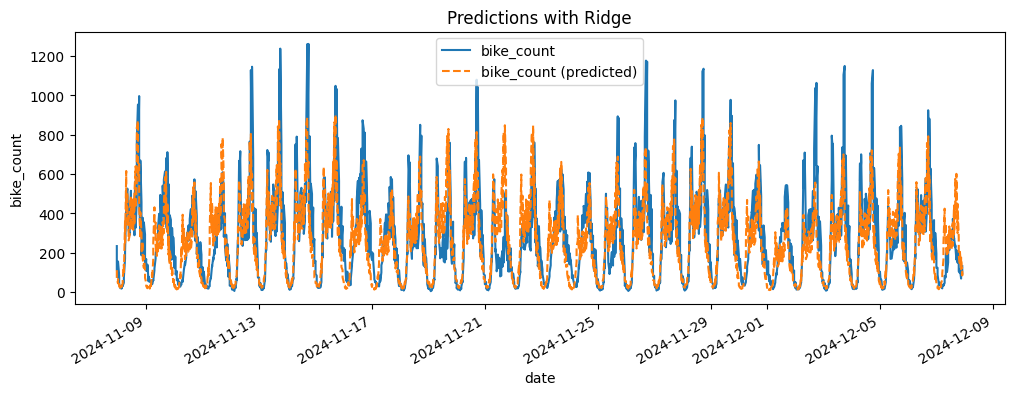

: 

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))

df_viz.plot(x="date", y="bike_count", ax=ax)
df_viz.plot(x="date", y="bike_count (predicted)", ax=ax, ls="--")
ax.set_title("Predictions with Ridge")
ax.set_ylabel("bike_count")

So we start to see the daily trend, and some of the week day differences are accounted for, however we still miss the details and the spikes in the evening are under-estimated.

A useful way to visualize the error is to plot `y_pred` as a function of `y_true`,

<Axes: xlabel='y_true', ylabel='y_pred'>

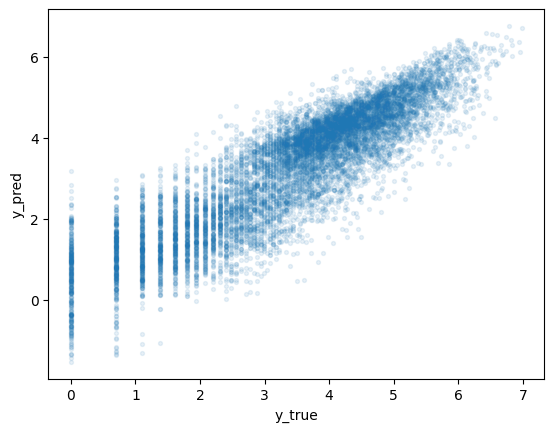

In [27]:
fig, ax = plt.subplots()

df_viz = pd.DataFrame({"y_true": y_valid, "y_pred": pipe.predict(X_valid)}).sample(
    10000, random_state=0
)

df_viz.plot.scatter(x="y_true", y="y_pred", s=8, alpha=0.1, ax=ax)

It is recommended to use cross-validation for hyper-parameter tuning with [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or more reliable model evaluation with [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score). In this case, because we want the test data to always be in the future as compared to the train data, we can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html):

<img src="https://i.stack.imgur.com/Q37Bn.png" />

The disadvantage, is that we can either have the training set size be different for each fold which is not ideal for hyper-parameter tuning (current figure), or have constant sized small training set which is also not ideal given the data periodicity. This explains that generally we will have worse cross-validation scores than test scores:

In [28]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

cv = TimeSeriesSplit(n_splits=6)

# When using a scorer in scikit-learn it always needs to be better when smaller, hence the minus sign.
scores = cross_val_score(
    pipe, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error"
)
print("RMSE: ", scores)
print(f"RMSE (all folds): {-scores.mean():.3} ± {(-scores).std():.3}")

RMSE:  [-0.96370992 -0.87155645 -0.85104595 -0.87402962 -1.0638737  -0.96757066]
RMSE (all folds): 0.932 ± 0.0744
